<a href="https://colab.research.google.com/github/itaborai83/ecd221-ML-exercicio-01/blob/main/Exerc%C3%ADcio_2_Problemas_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning
## Exercício 2: Problemas de Classificação

<b>Alunos: </b>

 - Alexandre Carboni da Silva

 - Agnello Hupp

 - Carlos Andrey Gois de Oliveira

 - Daniel Lemos Itaboraí

 - Rafaela Schifino Azevedo

 - Renan Giordano Sfirri



---

## Definição do Problema


https://www.kaggle.com/datasets/adityakadiwal/water-potability
---

### Contexto: 
Acesso a agua potavel é essencial para a saude, sendo um direito humano basico e um componente de politica efetiva para proteçao sanitaria. Isso é importante para problemas de desenvolvimento de saude a nivel nacional, regional e local. 

Em algumas regioes foi provado que o investimento em suprimento de agua e sanitarizacao podem levar enriquecimento e desenvolvimento economico uma vez que a reducao de doenças e efeitos sanitarios adversos superam os custos de intervencao governamental. 

In [87]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split # para o holdout
from sklearn.model_selection import KFold # para a validação cruzada
from sklearn.model_selection import StratifiedKFold # para a validação cruzada estratificada
from sklearn.model_selection import cross_val_score # para a validação cruzada
from sklearn.model_selection import GridSearchCV # para o grid search
from sklearn.metrics import classification_report # métricas - relatório de classificação
from sklearn.metrics import confusion_matrix # métricas - matriz de confusão
from sklearn.metrics import accuracy_score # métricas - acurácia
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.tree import DecisionTreeClassifier # para Árvore de Classificação
from sklearn.neighbors import KNeighborsClassifier # para KNN
from sklearn.naive_bayes import GaussianNB # para Naive Bayes
from sklearn.linear_model import LogisticRegression # para Regressão Logística
from sklearn.ensemble import AdaBoostClassifier # para AdaBoost
from sklearn.ensemble import RandomForestClassifier # para Random Forest
from sklearn.svm import SVC # para SVM
from sklearn.pipeline import Pipeline # para o pipeline

In [19]:
# setup ambiente

# supressão de warnings
import warnings
warnings.filterwarnings("ignore")

# configura pandas para exibição de apenas duas casas decimais nas variaveis
pd.set_option('display.float_format', lambda x: '%0.2f' % x)

In [77]:
# constantes
DATA_URL          = "https://raw.githubusercontent.com/itaborai83/ecd221-ML-exercicio-02/main/water_potability_exercicio_01.csv?random=" + str(random.randint(0, 999999999))
FIELD_SEPARATOR   = ","
COLUMN_NAMES      = [ 
    'hardness*sulfate',
    'hardness^2',
    'ph*chloramines',
    'ph*hardness',
    'ph*solids',
    'ph*sulfate',
    'ph^2',
    'solids*chloramines',
    'solids*sulfate',
    'sulfate^2',
    'potability' 
]
RANDOM_SEED       = 7
TEST_PERCENTAGE   = 0.2
K_FOLDS           = 10
SCORING_METHOD    = "accuracy"


In [78]:
# Carga do dataset
water_df = pd.read_csv(DATA_URL, names=COLUMN_NAMES, sep=FIELD_SEPARATOR, skiprows=1) # Carga do Dataset
water_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hardness*sulfate    3276 non-null   float64
 1   hardness^2          3276 non-null   float64
 2   ph*chloramines      3276 non-null   float64
 3   ph*hardness         3276 non-null   float64
 4   ph*solids           3276 non-null   float64
 5   ph*sulfate          3276 non-null   float64
 6   ph^2                3276 non-null   float64
 7   solids*chloramines  3276 non-null   float64
 8   solids*sulfate      3276 non-null   float64
 9   sulfate^2           3276 non-null   float64
 10  potability          3276 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 281.7 KB


## Particionamento em conjuntos de treino e teste (holdout)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [99]:
# Separação em bases de treino e teste
all_except_target = water_df.columns.difference(["potability"])
X_df = water_df[ all_except_target ] 
y_df = water_df[ ["potability"] ] 
X_train, X_test, y_train, y_test = train_test_split(
    X_df, 
    y_df, 
    test_size     = TEST_PERCENTAGE, 
    random_state  = RANDOM_SEED,
    shuffle       = True,
    stratify      = y_df
  )

X = X_df.to_numpy()
y = y_df.to_numpy()

# exibe as dimensões do dataset particionado
print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")

X_train : (2620, 10)
X_test  : (656, 10)
y_train : (2620, 1)
y_test  : (656, 1)


## Validação Cruzada e métrica de avaliação

* Métricas de avaliação: http://scikit-learn.org/stable/modules/model_evaluation.html
* Validação Cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [81]:
# definindo como será a validação cruzada
kfold = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_SEED) # com estratificação

LR-RAW: mean=0.6729007633587786, stdev=0.014787305822756114
KNN-RAW: mean=0.6564885496183205, stdev=0.022386073738343785
CART-RAW: mean=0.748091603053435, stdev=0.016282999242520264
NB-RAW: mean=0.6229007633587786, stdev=0.016619496990135294
SVM-RAW: mean=0.6778625954198473, stdev=0.016914900615389562
ADA-RAW: mean=0.7820610687022901, stdev=0.01769362898702177
FRST-RAW: mean=0.7988549618320612, stdev=0.027419885581163074
LR-NRM: mean=0.6534351145038169, stdev=0.018915285028036438
KNN-NRM: mean=0.6396946564885496, stdev=0.03152958233292119
CART-NRM: mean=0.7461832061068703, stdev=0.022916661148516163
NB-NRM: mean=0.6229007633587786, stdev=0.016619496990135294
SVM-NRM: mean=0.6534351145038169, stdev=0.01635441624857141
ADA-NRM: mean=0.7820610687022901, stdev=0.020229007633587776
FRST-NRM: mean=0.7900763358778626, stdev=0.029017676043890408
LR-STD: mean=0.6729007633587786, stdev=0.014787305822756114
KNN-STD: mean=0.6446564885496183, stdev=0.027334746976784556
CART-STD: mean=0.748091603053

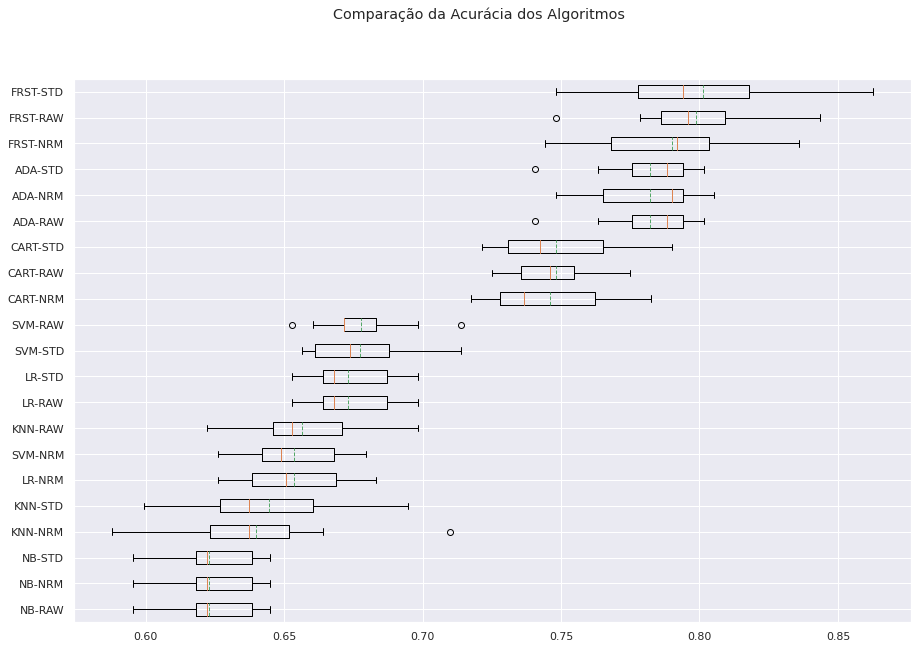

In [89]:
# criação do pipeline
np.random.seed(RANDOM_SEED)

# dicionário para armazenar os pipelines
pipelines = {}

# regressão logísitica com dados brutos
pipelines['LR-RAW']   = Pipeline([  ('LR',  LogisticRegression(max_iter=200))                                 ])
# K-nearest neighbors com dados brutos
pipelines['KNN-RAW']  = Pipeline([  ('KNN', KNeighborsClassifier())                                           ])
# Árovre de decisão com dados brutos
pipelines['CART-RAW'] = Pipeline([  ('CART', DecisionTreeClassifier())                                        ])
# Naive Bayes Gaussiano com dados brutos
pipelines['NB-RAW']   = Pipeline([  ('NB', GaussianNB())                                                      ])
# SVM com dados brutos
pipelines['SVM-RAW']  = Pipeline([  ('SVM', SVC())                                                            ])
# AdaBoost com dados brutos
pipelines['ADA-RAW']  = Pipeline([  ('ADA', AdaBoostClassifier())                                             ])
# RandomForest com dados brutos
pipelines['FRST-RAW']  = Pipeline([  ('FRST', RandomForestClassifier())                                       ])

# regressão logísitica com dados normalizados
pipelines['LR-NRM']   = Pipeline([  ('NRM', MinMaxScaler()), ('LR',  LogisticRegression(max_iter=200))        ])
# K-nearest neighbors com dados normalizados
pipelines['KNN-NRM']  = Pipeline([  ('NRM', MinMaxScaler()), ('KNN', KNeighborsClassifier())                  ])
# Árovre de decisão com dados normalizados
pipelines['CART-NRM'] = Pipeline([  ('NRM', MinMaxScaler()), ('CART', DecisionTreeClassifier())               ])
# Naive Bayes Gaussiano com dados normalizados
pipelines['NB-NRM']   = Pipeline([  ('NRM', MinMaxScaler()), ('NB', GaussianNB())                             ])
# SVM com dados normalizados
pipelines['SVM-NRM']  = Pipeline([  ('NRM', MinMaxScaler()), ('SVM', SVC())                                   ])
# AdaBoost com dados normalizados
pipelines['ADA-NRM']  = Pipeline([  ('NRM', MinMaxScaler()), ('ADA', AdaBoostClassifier())                    ])
# RandomForest com dados normalizados
pipelines['FRST-NRM'] = Pipeline([  ('NRM', MinMaxScaler()), ('FRST', RandomForestClassifier())               ])

# regressão logísitica com dados padronizados
pipelines['LR-STD']   = Pipeline([  ('STD', StandardScaler()), ('LR',  LogisticRegression(max_iter=200))      ])
# K-nearest neighbors com dados padronizados
pipelines['KNN-STD']  = Pipeline([  ('STD', StandardScaler()), ('KNN', KNeighborsClassifier())                ])
# Árovre de decisão com dados padronizados
pipelines['CART-STD'] = Pipeline([  ('STD', StandardScaler()), ('CART', DecisionTreeClassifier())             ])
# Naive Bayes Gaussiano com dados padronizados
pipelines['NB-STD']   = Pipeline([  ('STD', StandardScaler()), ('NB', GaussianNB())                           ])
# SVM com dados padronizados
pipelines['SVM-STD']  = Pipeline([  ('STD', StandardScaler()), ('SVM', SVC())                                 ])
# AdaBoost com dados padronizados
pipelines['ADA-STD']  = Pipeline([  ('STD', StandardScaler()), ('ADA', AdaBoostClassifier())                  ])
# RandomForest com dados padronizados
pipelines['FRST-STD'] = Pipeline([  ('STD', StandardScaler()), ('FRST', RandomForestClassifier())               ])

# lista para armazenar os resultados das validações cruzadas
results = {}

# Aplicação dos pipelines
for name, model in pipelines.items():
    cv_results = cross_val_score(
        model,
        X_train, 
        y_train, 
        cv=kfold, 
        scoring=SCORING_METHOD
    )
    results[name] = cv_results
    mean = cv_results.mean()
    stdev = cv_results.std()
    print(f"{name}: mean={mean}, stdev={stdev}")

# ordena os valores pela acurácia média
sort_function = lambda key_value: np.mean(key_value[1])
sorted_results_list = sorted(results.items(), key=sort_function)
sorted_results = dict(sorted_results_list)

# boxplot de comparação dos algoritmos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação da Acurácia dos Algoritmos') 
ax = fig.add_subplot(111) # necessário para aparecer as legendas
plt.boxplot(sorted_results.values(), vert=False, meanline=True, showmeans=True) 
ax.set_yticklabels(sorted_results.keys()) 
plt.show()



## Otimizando os Hiperparâmetros com GridSearch

* GridSearch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [97]:
# Tuning do RandomForest - dados brutos
# hiperparâmetros que serão avaliados - 96 execuções ao todo
param_grid = {
    "FRST__n_estimators"      : [100, 150, 200],
    "FRST__criterion"         : ["gini", "entropy"],
    "FRST__min_samples_split" : [4, 6, 8],
    "FRST__bootstrap"         : [True, False]
}
pipeline = Pipeline([
      ("STD", StandardScaler()), 
      ("FRST", RandomForestClassifier()),
])

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=SCORING_METHOD, cv=kfold)
grid_result = grid.fit(X_train, y_train) # dados brutos

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Melhor: 0.801527 usando {'FRST__bootstrap': True, 'FRST__criterion': 'entropy', 'FRST__min_samples_split': 6, 'FRST__n_estimators': 200}


## Melhor Acurácia Encontrada ***0.801527***

 - **n_estimators**: 200

 - **bootstrap**: True

 - **criterion**: entropy 

 - **min_samples_split**: 6


In [102]:
# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
sorted_results = []
for mean, stdev, param in zip(means, stds, params):
    sorted_results.append((mean, stdev, param))

# ordena os resultados pela acurácia decrescente
sorted_results.sort(reverse=True)

for mean, stdev, param in sorted_results:    
    print("%f (%f): %s" % (mean, stdev, param))

0.801527 (0.024558): {'FRST__bootstrap': True, 'FRST__criterion': 'entropy', 'FRST__min_samples_split': 6, 'FRST__n_estimators': 200}
0.801145 (0.028483): {'FRST__bootstrap': True, 'FRST__criterion': 'gini', 'FRST__min_samples_split': 8, 'FRST__n_estimators': 200}
0.800382 (0.030822): {'FRST__bootstrap': True, 'FRST__criterion': 'entropy', 'FRST__min_samples_split': 4, 'FRST__n_estimators': 150}
0.800000 (0.028110): {'FRST__bootstrap': True, 'FRST__criterion': 'entropy', 'FRST__min_samples_split': 6, 'FRST__n_estimators': 100}
0.799618 (0.024094): {'FRST__bootstrap': True, 'FRST__criterion': 'gini', 'FRST__min_samples_split': 8, 'FRST__n_estimators': 150}
0.799237 (0.028927): {'FRST__bootstrap': True, 'FRST__criterion': 'entropy', 'FRST__min_samples_split': 8, 'FRST__n_estimators': 100}
0.798855 (0.028050): {'FRST__bootstrap': True, 'FRST__criterion': 'gini', 'FRST__min_samples_split': 6, 'FRST__n_estimators': 150}
0.798855 (0.029959): {'FRST__bootstrap': True, 'FRST__criterion': 'gini

## Fazendo as predições

In [103]:
np.random.seed(RANDOM_SEED) # definindo uma seed global 

# padronização os dados de treino
scaler = StandardScaler().fit(X_train) # ajuste da transformação com os dados de treino
rescaledX = scaler.transform(X_train) # aplicação da transformação nos dados de treino

# padronização os dados de treino - isto aqui seria data leakage
# scaler = StandardScaler().fit(X) # ajuste da transformação em todos os dados
# rescaledX = scaler.transform(X) # aplicação da transformação em todos os dados

# criando um modelo com a melhor configuração até o momento
# e treinar este modelo com TODO o conjunto de treino (padronizado)
model = RandomForestClassifier(
    n_estimators      = 200, 
    bootstrap         = True, 
    criterion         = "entropy",
    min_samples_split = 6
)
model.fit(rescaledX, y_train)

# padronização dos dados de teste, cuidando para não fazer data leakage, ou seja:
# usando o scaler que defini com o conjunto de treino, para manter a mesma escala
rescaledTestX = scaler.transform(X_test) # aplicação da transformação nos dados de teste

# predição
predictions = model.predict(rescaledTestX) # repare que para fazer a predição eu só passo o X e não o y

# estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.7957317073170732


In [123]:
# exibe a variável target do conjunto de testes e a predição realizada

zip_pot_preds = zip(list(y_test['potability']), predictions)
for i, (potability, prediction) in enumerate(zip_pot_preds):
  if (i + 1) % 20 == 0:
    end = '\n'
  else:
    end = ' '
  tuple_pot_pred = (potability, prediction)
  print(tuple_pot_pred, end=end)






(1, 1) (1, 1) (1, 1) (1, 1) (0, 1) (1, 0) (0, 0) (0, 1) (1, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1)
(0, 0) (0, 0) (1, 1) (0, 1) (0, 0) (1, 1) (1, 1) (0, 0) (0, 1) (0, 1) (0, 0) (0, 0) (0, 0) (0, 1) (0, 0) (1, 1) (0, 0) (0, 0) (1, 0) (1, 1)
(0, 0) (1, 0) (0, 0) (1, 0) (0, 0) (0, 0) (1, 1) (0, 1) (0, 0) (0, 0) (1, 1) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 1) (0, 1) (1, 1)
(0, 0) (1, 1) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (1, 1) (1, 0) (1, 0) (0, 0) (1, 0) (1, 1) (1, 1) (1, 1) (1, 0) (0, 0) (0, 0) (1, 1) (0, 0)
(0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (0, 0) (0, 0) (1, 0) (0, 0) (1, 1) (1, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (0, 1) (1, 1) (1, 1) (0, 0)
(0, 1) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (1, 1) (1, 0) (1, 1) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0)
(0, 1) (1, 0) (1, 0) (1, 1) (0, 1) (1, 0) (0, 0) (1, 0) (1, 1) (0, 0) (1, 0) (1, 1) (1, 1) (0, 0) (1, 0) (1, 1) (1, 1) (0, 0) (0, 0) (1, 1)
(0, 1) (1, 1) (0, 1)

## Preparando o modelo para produção...

In [124]:
# Agora tenho que treinar o modelo com todo o X e não apenas com X_train
np.random.seed(RANDOM_SEED) # definindo uma seed global 

# padronização os dados de treino
scaler = StandardScaler().fit(X) # ajuste da transformação com todos os dados
rescaledX = scaler.transform(X) # aplicação da transformação nos dados

# criando um modelo com a melhor configuração até o momento
# e treinar este modelo com TODOS os dados (todo o dataset, padronizado)
model = RandomForestClassifier(
    n_estimators      = 200, 
    bootstrap         = True, 
    criterion         = "entropy",
    min_samples_split = 6
)
model.fit(rescaledX, y)

y_predicted = model.predict(rescaledX) # faz as predições com todo o dataset
print(accuracy_score(y, y_predicted)) # acurácia de treino

0.9984737484737485


Imagine que após diversos experimentos verificamos que o melhor modelo até o momento é o SVM com C=0.1, kernel='linear' e dados padronizados. Vamos então treinar um modelo usando TODO o conjunto de treino e testá-lo usando todo o conjunto de teste, que estava separado desde o início do notebook.

**Agora pesquise outras bibliotecas, modelos de classificação ou funcionalidades (não estudados em sala) e aplique-os no problema. Lembre-se que quanto mais você pesquisar e treinar, mais irá aprender.**

**O que você aprendeu sobre o problema de classificação deste dataset?**